**Image to Text (Image Captioning)**

Images are converted to text using the pre-trained Salesforce BLIP 2 model available on Hugging Face.

In [ ]:
#Uncomment below comment if package not available on your system

# !pip install transformers
# !pip install --upgrade transformers

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

In [ ]:
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

For stability purposes, it is recommended to have accelerate installed when using this model in torch.float16, please install it with `pip install accelerate`


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

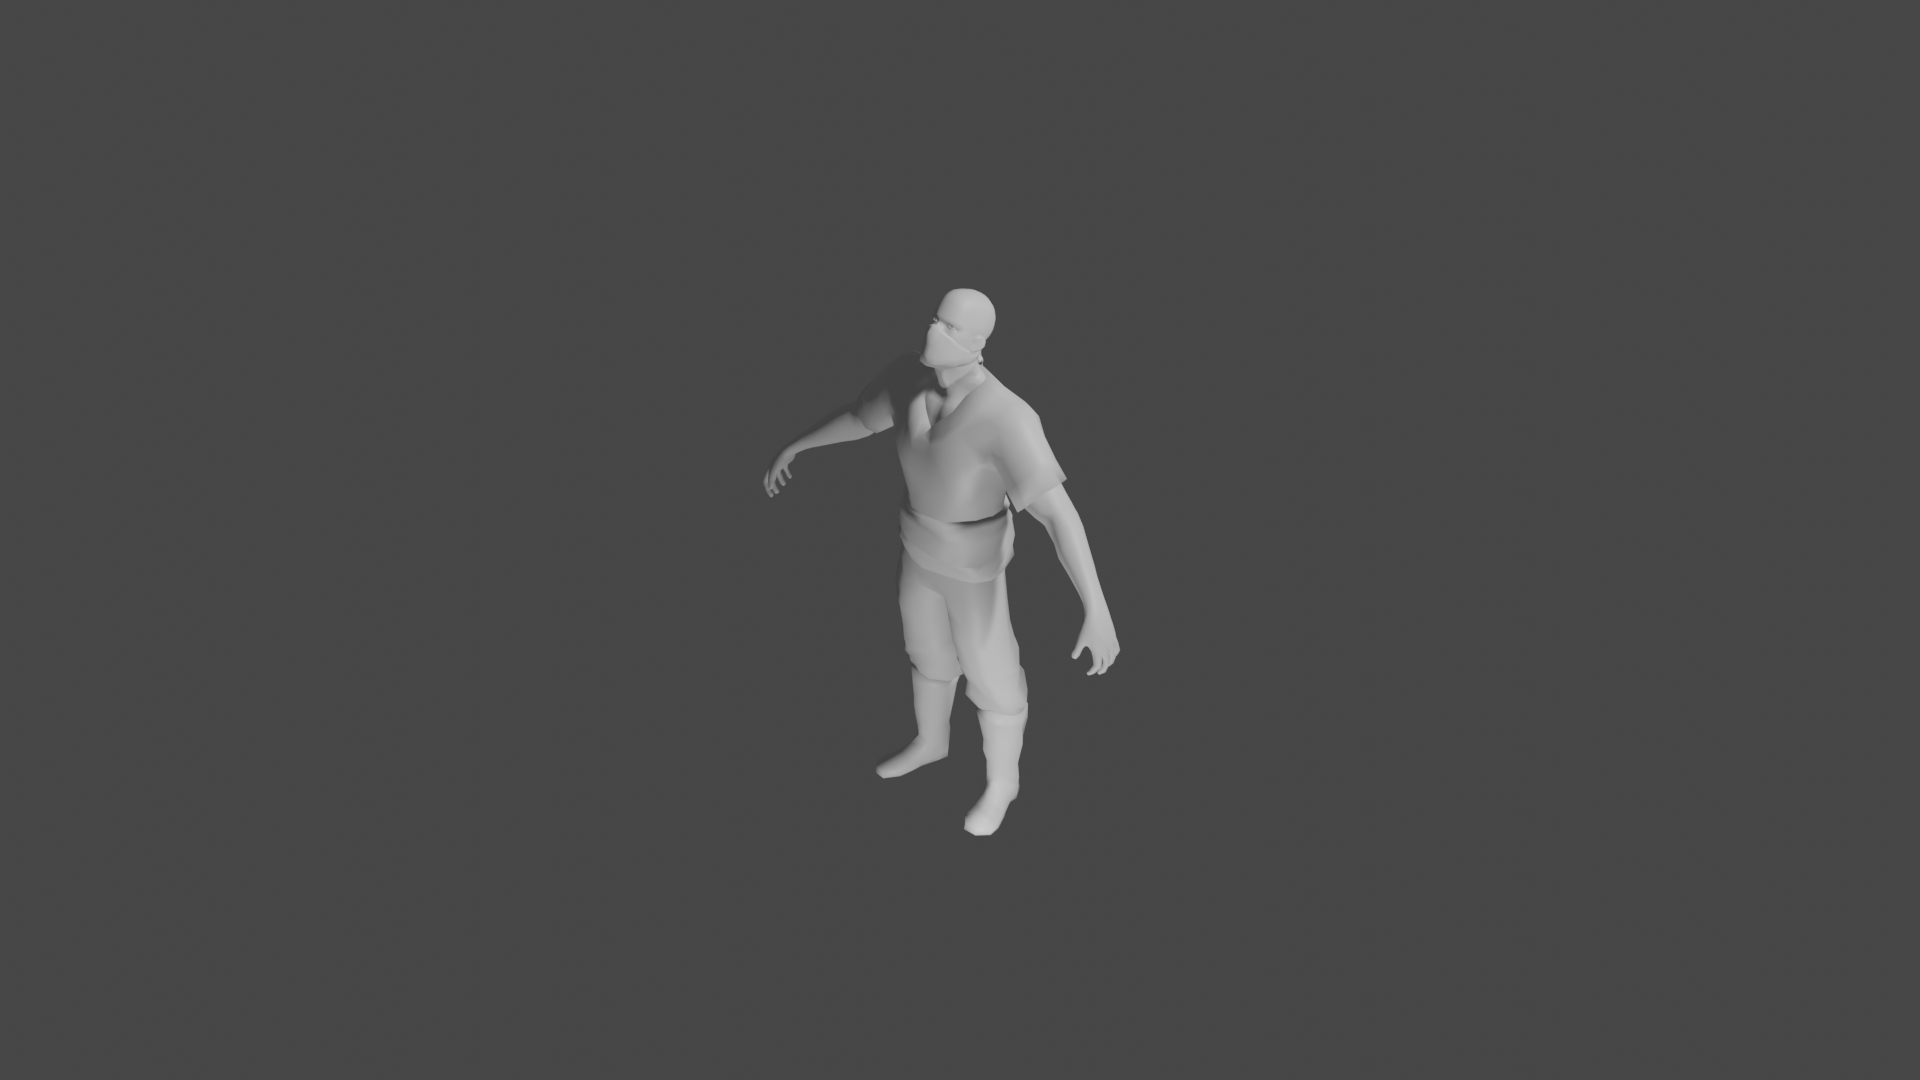

In [ ]:
from PIL import Image

image = Image.open("/content/rendered_image_1.png").convert('RGB')  
display(image)

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a 3d model of a man standing in a pose


In [ ]:
prompt = "Question: Where is the man's head pointed? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

It's pointing at the camera


In [ ]:
prompt = "Question: Is the man giving a thumbs up? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

No, he's just standing there


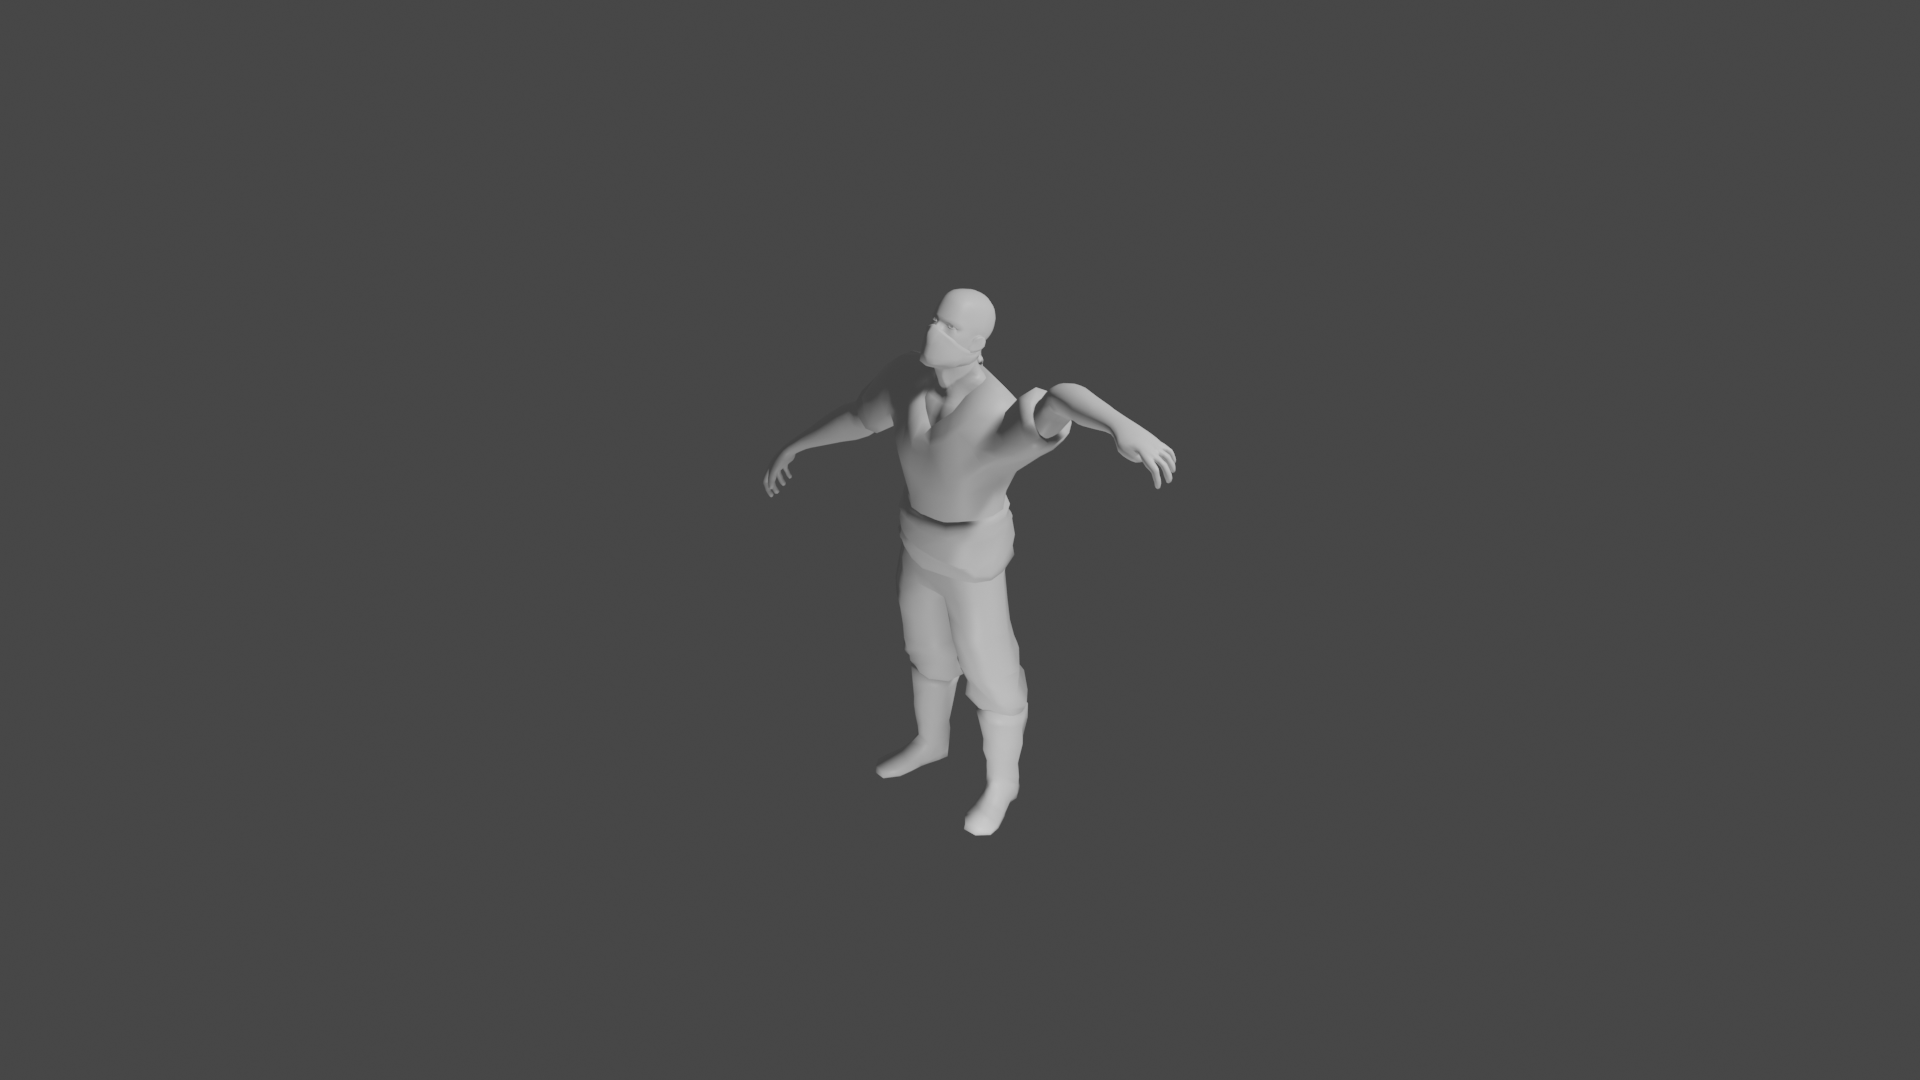

In [ ]:
image = Image.open("/content/rendered_image_2.png").convert('RGB')  
display(image)

In [ ]:
prompt = "Question: Is the man giving a thumbs up? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

No, he's just holding his hand out to the side


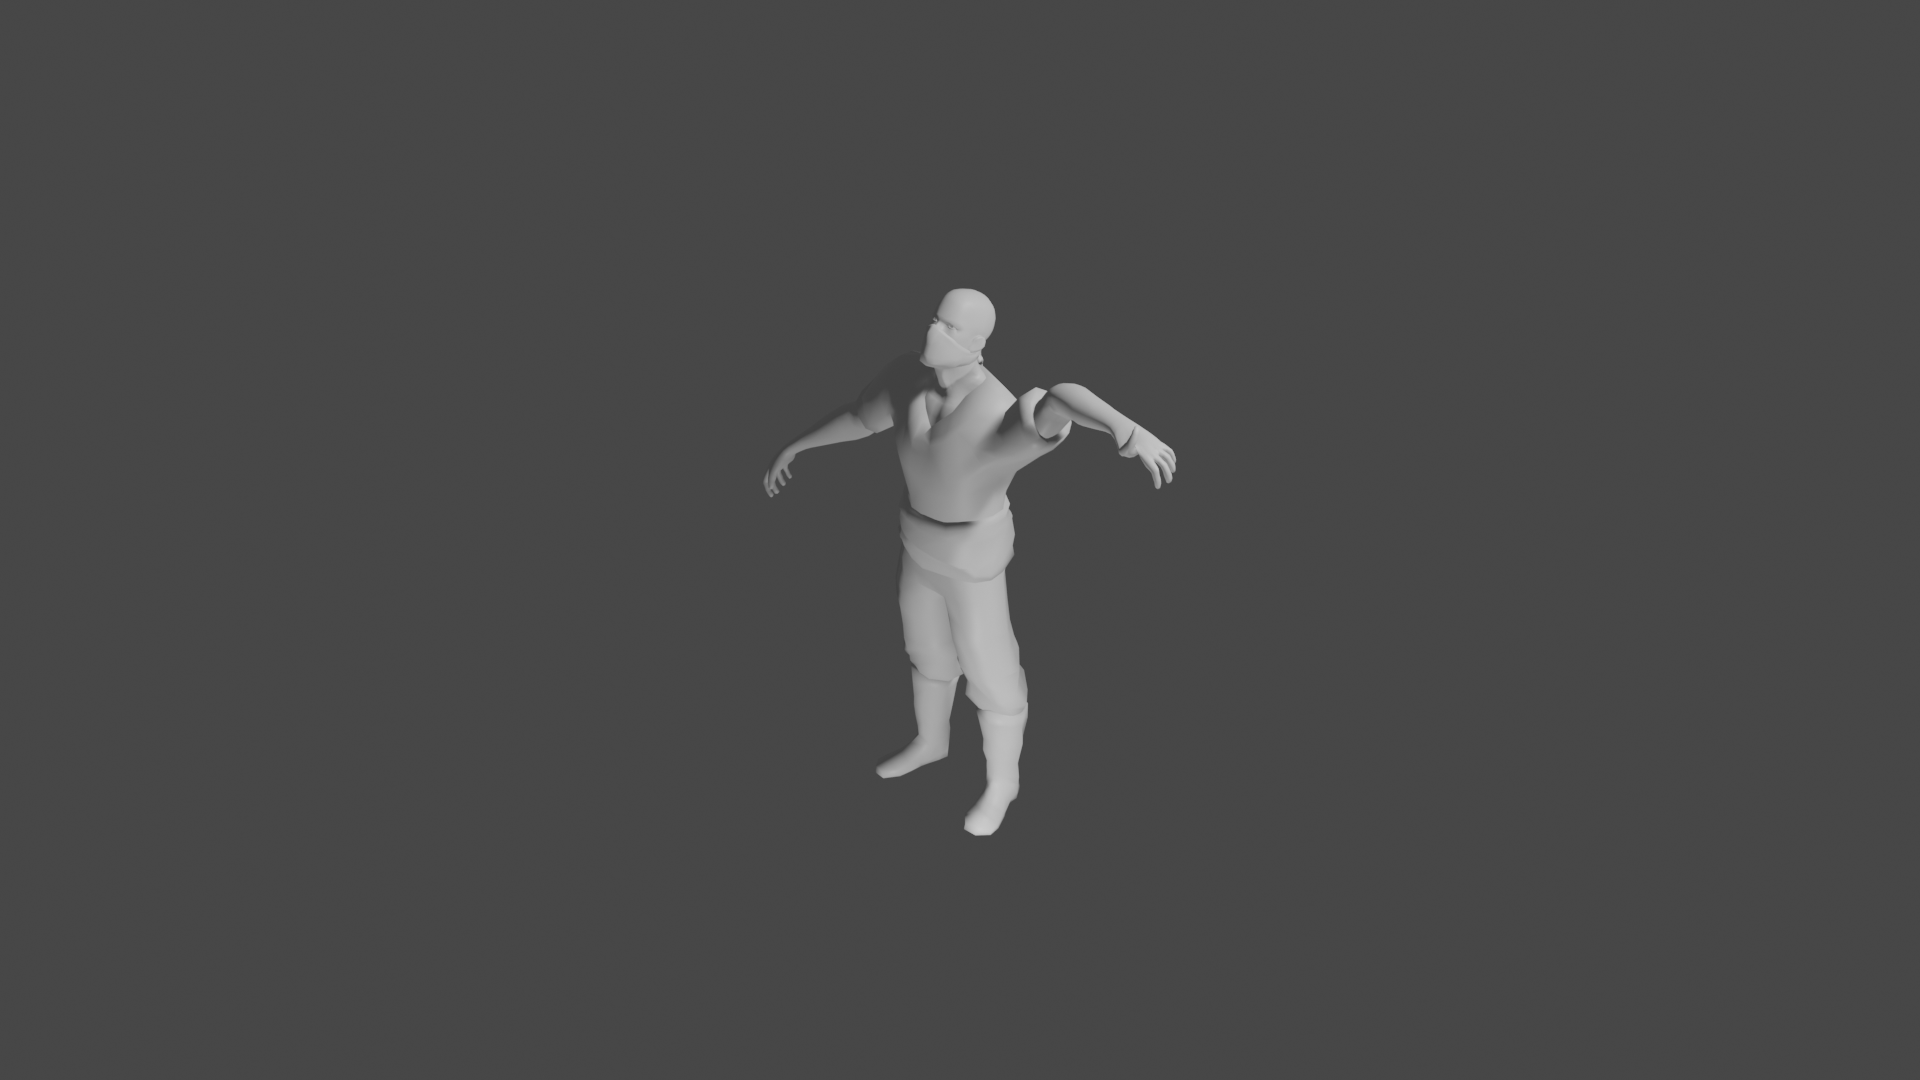

In [ ]:
image = Image.open("/content/rendered_image_3.png").convert('RGB')  
display(image)

In [ ]:
prompt = "Question: Is the man giving a thumbs up? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

No, he's just holding his hand out to the side


In [ ]:
prompt = "Question: Is the man sitting? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Yes, he is sitting


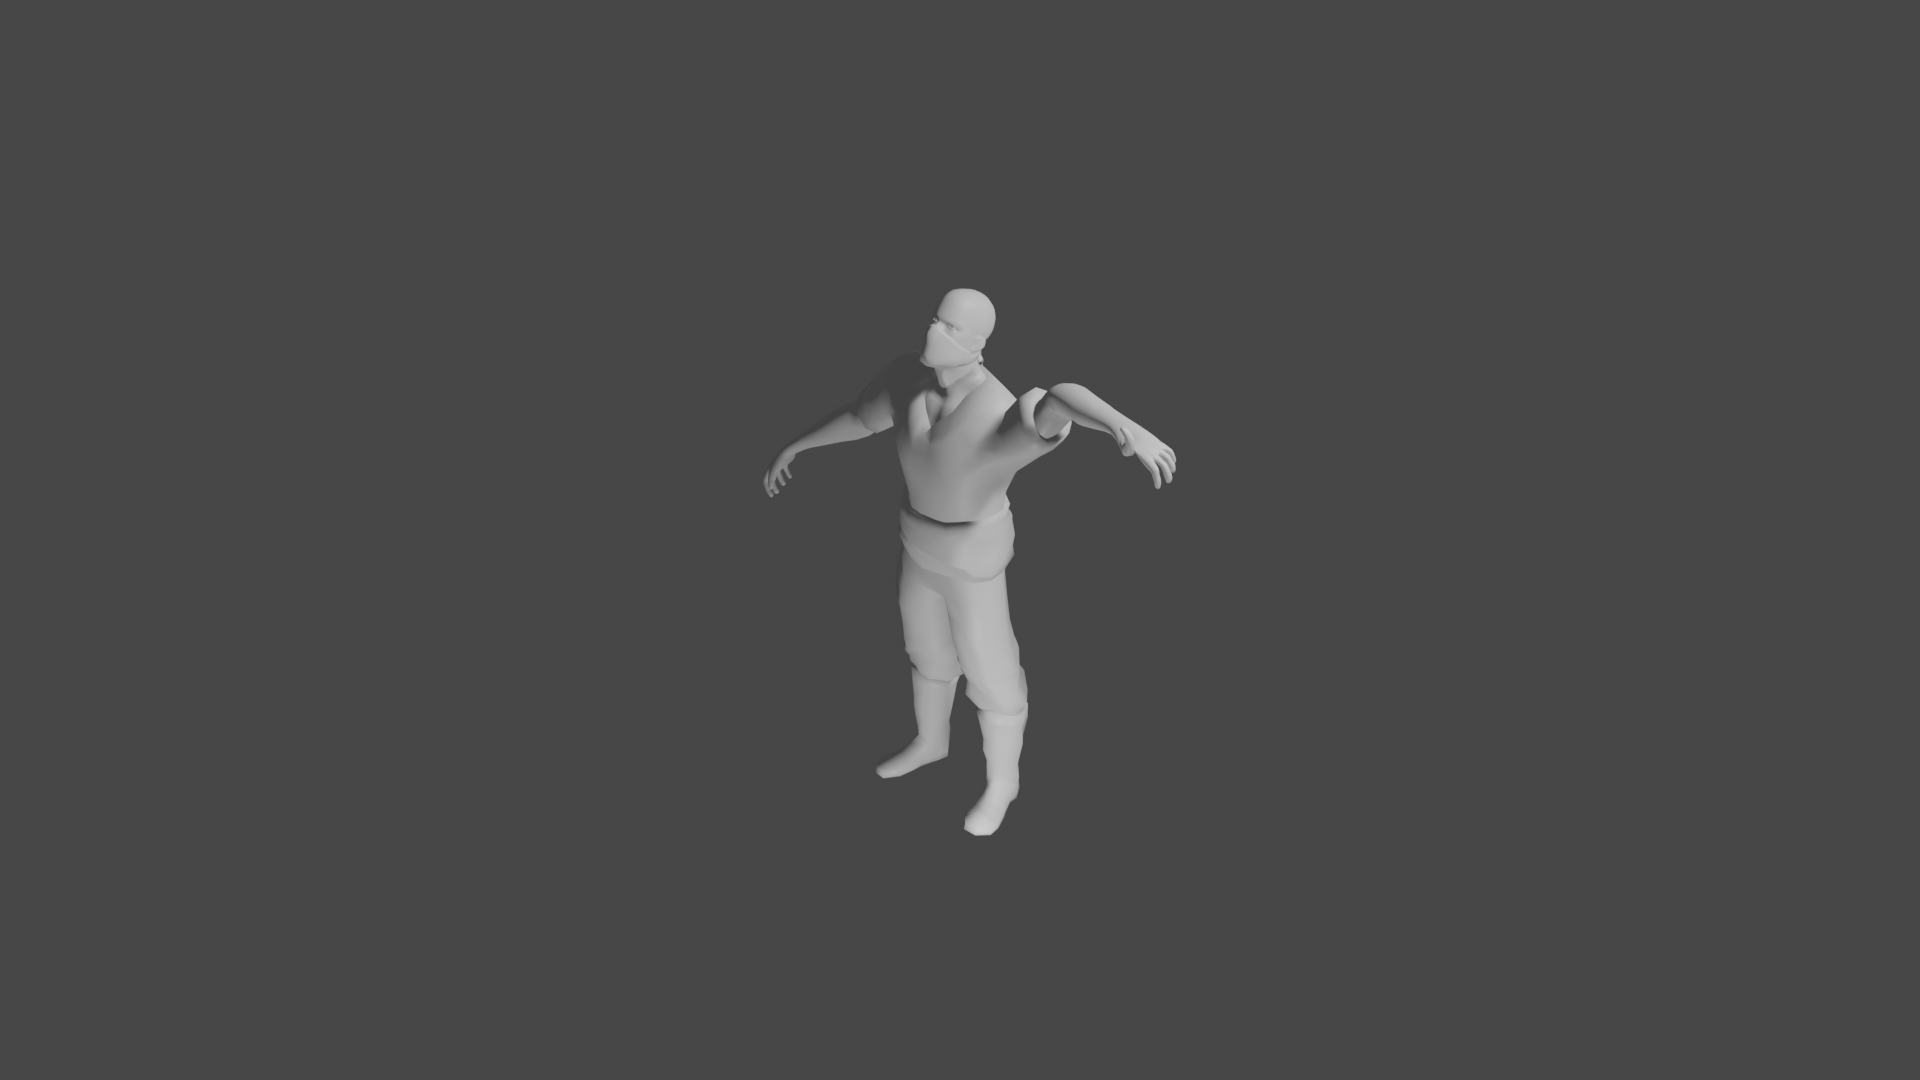

In [ ]:
image = Image.open("/content/rendered_image_4.png").convert('RGB')  
display(image)

In [ ]:
prompt = "Question: Is the man giving a thumbs up? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

No, he's just holding his hand out to the side
